In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [264]:
BASE_PATH = "~/Code/FP-MAX-LSHADE/results/generations/"

In [265]:
Seeds = { 
          10 : [512, 166, 538, 894, 449, 195, 88, 144, 903, 577, 830, 827, 537, 179, 660, 844, 999, 858, 744, 740, 221, 443, 219, 484, 5, 23, 465, 864, 245, 523],
          30 : [449, 144, 830, 179, 999, 740, 219, 23, 245, 588, 746, 967, 275, 389, 561, 775, 250, 121, 152, 696, 691, 836, 51, 371, 881, 594, 362, 511, 416, 372],
          50 : [903, 179, 744, 484, 245, 11, 450, 389, 167, 947, 152, 862, 283, 371, 431, 439, 416, 112, 613, 184, 46, 499, 890, 587, 217, 942, 808, 633, 174, 404],
          100 : [744, 245, 450, 167, 152, 283, 431, 416, 613, 46, 890, 217, 808, 174, 727, 615, 347, 455, 423, 846, 629, 729, 48, 806, 401, 859, 3, 67, 351, 232]
        }

In [273]:
# Parameters:
D = 100
function = 2
seed = Seeds[D][function-1]

elite_rate = 0.1
disc_step = 0.0098
support = 95
gen_step = 20
sol_fill_strategy = "rand"

config = f"--fpmaxlshade --crossgen --insert --er {elite_rate} --gs {gen_step} --h {disc_step} --s {support} --sf  --analysis --{sol_fill_strategy} --halphpop "
filepath = BASE_PATH +  f"FP-MAX-LSHADE/{config}/D{D}/cec-f{function}/s{seed}/dm-effect.csv"

In [274]:
df = pd.read_csv(filepath, sep=';')
df

G            PD   NP    APS  MSR       PSR
0        1  1.464640e+06  NaN    NaN  NaN  0.845000
1        2  1.389250e+06  NaN    NaN  NaN  0.789298
2        3  1.328440e+06  NaN    NaN  NaN  0.751955
3        4  1.277930e+06  NaN    NaN  NaN  0.689983
4        5  1.235700e+06  NaN    NaN  NaN  0.640135
...    ...           ...  ...    ...  ...       ...
3396  3397  5.555090e-02  NaN    NaN  NaN  0.250000
3397  3398  5.555100e-02  NaN    NaN  NaN  0.000000
3398  3399  5.555100e-02  NaN    NaN  NaN  0.250000
3399  3400  5.555100e-02  1.0  100.0  0.0  0.250000
3400  3401  6.346450e-02  NaN    NaN  NaN  0.750000

[3401 rows x 6 columns]

In [169]:
df.PD /= df.PD.iloc[0]
df.PSR /= df.PSR.iloc[0]

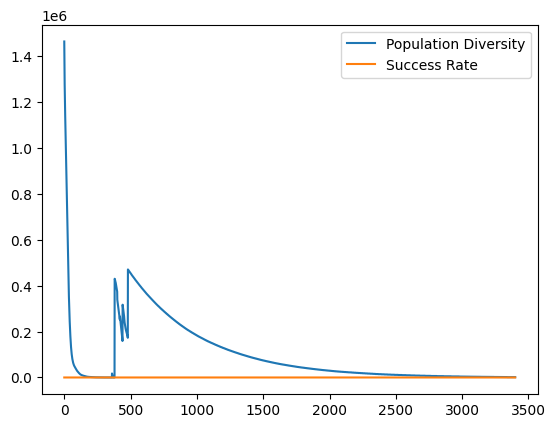

In [234]:
df.PD.plot(label="Population Diversity")
df.PSR.plot(label="Success Rate")
plt.legend()

In [275]:
df = pd.read_csv(filepath, sep=';')
m_df = df.dropna()

In [276]:
m_df.MSR *= 100

/tmp/ipykernel_166547/1972038129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df.MSR *= 100


In [277]:
df.PSR /= df.PSR.max()
df.PSR *= 100

df.PD /= df.PD.max()
df.PD *= 100

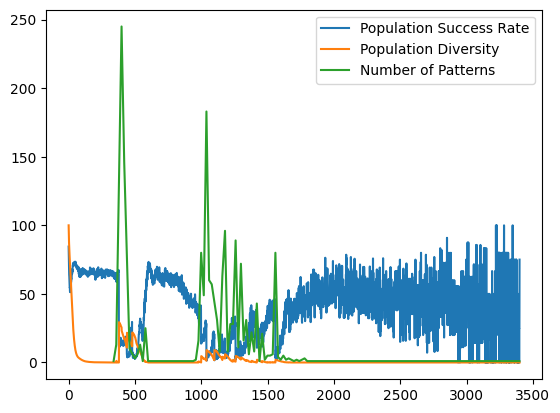

In [278]:
df.PSR.plot(label="Population Success Rate")
df.PD.plot(label="Population Diversity")
m_df.NP[m_df.NP < 300].plot(label="Number of Patterns")
#m_df.APS.plot(label="Avg. Pattern Size")
#m_df.MSR.plot()
plt.legend()

In [242]:
# Number of Patterns:
print("MIN | MAX | AVG")
print(f"{m_df.NP.min()} | {m_df.NP.max()} | {m_df.NP.mean():.5}")

MIN | MAX | AVG
1.0 | 4132.0 | 34.961


In [226]:
# Size of Patterns:
print("MIN | MAX | AVG")
print(f"{m_df.APS.min()} | {m_df.APS.max()} | {m_df.APS.mean():.5}")

MIN | MAX | AVG
8.0 | 30.0 | 24.891


In [228]:
# Population Success Rate:
print("MIN | MAX | AVG")
print(f"{m_df.PSR.min()} | {m_df.PSR.max()} | {m_df.PSR.mean():.5}")

MIN | MAX | AVG
0.0 | 0.333333 | 0.061412


In [229]:
# Patterns Success Rate:
print("MIN | MAX | AVG")
print(f"{m_df.MSR.min()} | {m_df.MSR.max()} | {m_df.MSR.mean():.5}")

MIN | MAX | AVG
0.0 | 100.0 | 54.545


In [250]:
m_df[m_df.NP >= 180]

G           PD      NP       APS      MSR       PSR
379  380      25.9106   383.0   9.31854   0.0000  0.114411
399  400  374065.0000   245.0  27.37960  94.6939  0.164196
439  440  159081.0000   308.0  25.01620  32.7922  0.062500
479  480  173057.0000  4132.0   8.13408  18.0263  0.000000

In [ ]:
avg cost = 10392.3
avg cost = 323.79